In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
%run My_function.ipynb

<div class="oc-richContent root-0-2-1" data-videotitle="video" data-current-user-id="328418" data-project-id="863" data-codio-button-label="Accéder au code"><p>&nbsp;</p>
<p><img src="https://user.oc-static.com/upload/2023/03/15/16788718737642_Banner-Sce%CC%81nario.png" alt="Bannière scénario"></p>

<p>Vous êtes consultant Data Analyst dans une entreprise spécialisée dans la data. Votre entreprise a décroché une prestation en régie au sein de l’Organisation nationale de lutte contre le faux-monnayage (ONCFM).</p>
<p>&nbsp;</p>
<figure><a href="https://user.oc-static.com/upload/2020/11/25/16063163322759_Screen%20Shot%202020-11-05%20at%2011.15.15.png" class="oc-imageLink oc-imageLink--disabled"><img src="https://user.oc-static.com/upload/2020/11/25/16063163322759_Screen%20Shot%202020-11-05%20at%2011.15.15.png" alt=""></a></figure>
<p>&nbsp;</p>
<p>Cette institution a pour objectif de mettre en place des méthodes d’identification des contrefaçons des billets en euros. Ils font donc appel à vous, spécialiste de la data, pour mettre en place une modélisation qui serait capable d’identifier automatiquement les vrais des faux billets. Et ce à partir simplement de certaines dimensions du billet et des éléments qui le composent.</p>
<p>Voici <a href="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/DAN-P10-cdc-detection-faux-billets.pdf">le cahier des charges de l’ONCFM</a>, ainsi que&nbsp;<a href="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/billets.csv">le jeu de données</a>.</p>
<p>Le client souhaite que vous travailliez directement depuis ses locaux sous la responsabilité de Marie, responsable du projet d’analyse de données à l’ONCFM. Elle vous laissera une grande autonomie pendant votre mission, et vous demande simplement que vous lui présentiez vos résultats une fois la mission terminée. Elle souhaite voir quels sont les traitements et analyses que vous avez réalisés en amont, les différentes pistes explorées pour la construction de l’algorithme, ainsi que le modèle final retenu.</p>
<p>Après avoir lu en détail le cahier des charges, vous vous préparez à vous rendre à l’ONCFM pour prendre vos nouvelles fonctions. Vous notez tout de même un post-it qui se trouve sur le coin de votre bureau, laissé par un de vos collègues :</p>
<figure><a href="https://user.oc-static.com/upload/2020/11/25/16063165227448_De%CC%81tectez%20des%20faux%20billets%20-%20post%20it.png" class="oc-imageLink oc-imageLink--disabled"><img src="https://user.oc-static.com/upload/2020/11/25/16063165227448_De%CC%81tectez%20des%20faux%20billets%20-%20post%20it.png" alt="Lors de ma précédente mission, je me suis retrouvé avec un jeu de données comportant plein de valeurs manquantes, une vraie galère&nbsp;! Mais j’ai eu de très bons résultats en utilisant une régression linéaire pour combler ces dernières. Ça te servira peut-être pour ta prochaine mission, qui sait&nbsp;?"></a></figure>
<p>Vous embarquez le post-it dans vos affaires et vous dirigez donc à présent vers les bureaux de l’ONCFM pour commencer votre mission.</p>

<p><img src="https://user.oc-static.com/upload/2023/03/15/16788719253125_Banner-Livrables.png" alt="Bannière livrables"></p>

<ul>
<li>Votre code en R ou Python contenant :&nbsp;</li>
<ul>
<li>l’ensemble des traitements et des tests effectués ;</li>
<li>l’application finale.</li>
</ul>
</ul>
<aside data-claire-semantic="information">
<p>Pour faciliter votre passage devant le jury, déposez sur la plateforme, dans un dossier zip nommé “<strong><em>Titre_du_projet_nom_prénom</em></strong>”, le livrable du projet nommé comme suit : <strong>Nom</strong>_<strong>Prénom</strong>_<strong>n° du livrable</strong>_<strong>nom du livrable</strong>_<strong>date de démarrage du projet</strong>. Cela donnera :&nbsp;</p>
<ul>
<li><em>Nom_Prénom_1_code_mmaaaa</em></li>
</ul>
<p>Par exemple, le livrable peut être nommé comme suit <em>: Dupont_Jean_1_code</em>_<em>012023.</em></p>
</aside>

<p><img src="https://user.oc-static.com/upload/2023/03/15/16788719600459_Banner-Soutenance.png" alt="Bannière soutenance"></p>
<p>Durant la présentation orale, votre mentor jouera le rôle de Marie, la responsable du projet à l’ONCFM à qui vous présentez vos résultats :&nbsp;</p>
<ul>
<li><strong>Présentation des livrables (20 minutes)&nbsp;</strong>
<ul>
<li>Présentation de l’ensemble de votre cheminement, des traitements et analyses réalisés en amont, des différentes pistes explorées pour la construction de l’algorithme, et du modèle final retenu (15 minutes) ;</li>
<li>Test de l’algorithme en direct avec un jeu de données qui vous sera fourni pendant la soutenance, ayant la même forme que le jeu suivant : <a href="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/billets_production.csv">FICHIER billets_production.csv</a>&nbsp;(5&nbsp;minutes).</li>
</ul>
</li>
<li><strong>Discussion (5 minutes)</strong>
<ul>
<li>Échange de questions/réponses : l’évaluateur pourra revenir sur certains points pour vous questionner sur vos choix.</li>
<li>L’évaluateur vous fera un retour sur votre prestation en soutenance.</li>
</ul>
</li>
<li><strong>Debriefing (5 minutes)</strong></li>
<ul>
<li>À la fin de la soutenance, l'évaluateur arrêtera de jouer le rôle de Marie pour vous permettre de débriefer ensemble.</li>
</ul>
</ul>


# Récupération des données

In [3]:
data = pd.read_csv("Données/billets.csv",sep=";")

# Exploration des données

In [4]:
# On réalise une rapide analyse de nos données. On constate qu'il y a des valeurs manquantes dans la colonnes margin_low
my_first_analyse(data, graphique=False)

,observations,variables,type,moyennes,medianes,ecart_types,min,max,nb_valeurs_manquantes,%_valeurs_manquantes
is_genuine,1500,7,bool,0.666667,1.00,0.471562,False,True,0,0.00
diagonal,1500,7,float64,171.958440,171.96,0.305195,171.04,173.01,0,0.00
height_left,1500,7,float64,104.029533,104.04,0.299462,103.14,104.88,0,0.00
height_right,1500,7,float64,103.920307,103.92,0.325627,102.82,104.95,0,0.00
margin_low,1500,7,float64,4.485967,4.31,0.663813,2.98,6.9,37,2.47
margin_up,1500,7,float64,3.151473,3.14,0.231813,2.27,3.91,0,0.00
length,1500,7,float64,112.678500,112.96,0.872730,109.49,114.44,0,0.00


In [5]:
# On transforme le bool en binaire pour pouvoir l'utiliser par le suite dans nos algorithme 
data["is_genuine"].replace([True, False], [1,0], inplace=True)

In [6]:
# Création d'un DataFrame avec les valeurs manquantes de Margin_low
data_vide = data.loc[data["margin_low"].isna()]
# Création d'un DataFrame avec les valeurs complètes (qui nous servira à faire la régression linéaire)
data = data.dropna()

In [7]:
my_first_analyse(data)

,observations,variables,type,moyennes,medianes,ecart_types,min,max,nb_valeurs_manquantes,%_valeurs_manquantes
is_genuine,1463,7,int64,0.663705,1.00,0.472603,0.00,1.00,0,0.0
diagonal,1463,7,float64,171.959193,171.96,0.305457,171.04,173.01,0,0.0
height_left,1463,7,float64,104.031333,104.04,0.299605,103.14,104.88,0,0.0
height_right,1463,7,float64,103.921476,103.92,0.324181,102.91,104.95,0,0.0
margin_low,1463,7,float64,4.485967,4.31,0.663813,2.98,6.90,0,0.0
margin_up,1463,7,float64,3.153083,3.14,0.231466,2.27,3.91,0,0.0
length,1463,7,float64,112.674757,112.96,0.873222,109.49,114.32,0,0.0


In [8]:
data.dtypes

is_genuine        int64
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [9]:
display(data_vide.head())
print(data_vide.shape)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,1,171.94,103.89,103.45,NaN,3.25,112.79
99,1,171.93,104.07,104.18,NaN,3.14,113.08
151,1,172.07,103.80,104.38,NaN,3.02,112.93
197,1,171.45,103.66,103.80,NaN,3.62,113.27
241,1,171.83,104.14,104.06,NaN,3.02,112.36


(37, 7)


In [10]:
display(data.head())
print(data.shape)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


(1463, 7)


In [11]:
# Vérification du nombre de faux billets
print("Le nombre de vrai billets est de :",data.loc[data["is_genuine"]==True]["is_genuine"].count())
print("Le nombre de faux billets est de :",data.loc[data["is_genuine"]==False]["is_genuine"].count())

Le nombre de vrai billets est de : 971
Le nombre de faux billets est de : 492


In [12]:
print("Information concernant les vrais billets :")
my_exploration(data.loc[data["is_genuine"]==True])
print("Information concernant les faux billets :")
my_exploration(data.loc[data["is_genuine"]==False])

Information concernant les vrais billets :


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,971.0,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000
mean,1.0,171.988476,103.951679,103.809094,4.116097,3.052544,113.203059
std,0.0,0.301402,0.301518,0.288862,0.319124,0.185425,0.356123
min,1.0,171.040000,103.140000,102.910000,2.980000,2.270000,111.760000
25%,1.0,171.790000,103.745000,103.610000,3.905000,2.925000,112.960000
50%,1.0,171.990000,103.950000,103.810000,4.110000,3.050000,113.200000
75%,1.0,172.200000,104.140000,104.000000,4.340000,3.180000,113.460000
max,1.0,172.920000,104.860000,104.950000,5.040000,3.740000,114.320000


Information concernant les faux billets :


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,492.0,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,0.0,171.901402,104.188537,104.143272,5.215935,3.351504,111.632114
std,0.0,0.305473,0.224418,0.271683,0.553531,0.179343,0.615343
min,0.0,171.040000,103.510000,103.430000,3.820000,2.920000,109.490000
25%,0.0,171.697500,104.040000,103.950000,4.840000,3.227500,111.200000
50%,0.0,171.910000,104.180000,104.160000,5.190000,3.350000,111.630000
75%,0.0,172.092500,104.330000,104.320000,5.592500,3.472500,112.030000
max,0.0,173.010000,104.880000,104.950000,6.900000,3.910000,113.850000


In [13]:
# On calcule la différence de diagonale entre les vrais et les faux billets
diff_diag = (((data.loc[data["is_genuine"]==True]["diagonal"].mean())-(data.loc[data["is_genuine"]==False]["diagonal"].mean()))/(data.loc[data["is_genuine"]==True]["diagonal"].mean()))*100

# On calcule la différence de hauteur entre les vrais et les faux billets
diff_h_left = (((data.loc[data["is_genuine"]==True]["height_left"].mean())-(data.loc[data["is_genuine"]==False]["height_left"].mean()))/(data.loc[data["is_genuine"]==True]["height_left"].mean()))*100
diff_h_right = (((data.loc[data["is_genuine"]==True]["height_right"].mean())-(data.loc[data["is_genuine"]==False]["height_right"].mean()))/(data.loc[data["is_genuine"]==True]["height_right"].mean()))*100

# On calcule la différence de marge entre les vrais et les faux billets
diff_m_low = (((data.loc[data["is_genuine"]==True]["margin_low"].mean())-(data.loc[data["is_genuine"]==False]["margin_low"].mean()))/(data.loc[data["is_genuine"]==True]["margin_low"].mean()))*100
diff_m_up = (((data.loc[data["is_genuine"]==True]["margin_up"].mean())-(data.loc[data["is_genuine"]==False]["margin_up"].mean()))/(data.loc[data["is_genuine"]==True]["margin_up"].mean()))*100

# On calcule la différence de longeur entre les vrais et les faux billets
diff_length = (((data.loc[data["is_genuine"]==True]["length"].mean())-(data.loc[data["is_genuine"]==False]["length"].mean()))/(data.loc[data["is_genuine"]==True]["length"].mean()))*100

# Affichage des résultats sous forme de Tableau
pd.DataFrame(index=["Moyenne des écrats en %"],columns=["diagonale","height_left","height_right","margin_low","margin_up","length"],data=[[diff_diag, diff_h_left, diff_h_right, diff_m_low, diff_m_up, diff_length]])

,diagonale,height_left,height_right,margin_low,margin_up,length
Moyenne des écrats en %,0.050627,-0.227854,-0.321917,-26.720415,-9.793809,1.387723


En comparant les données ci-dessus, on constate que : 
- Les vrais billets ont une diagonale légèrement plus importante
- Les faux billets ont hauteur et des marges lègèrement plus importante
- Les faux billets sont plus petit que les vrais billets.

## Visualisation

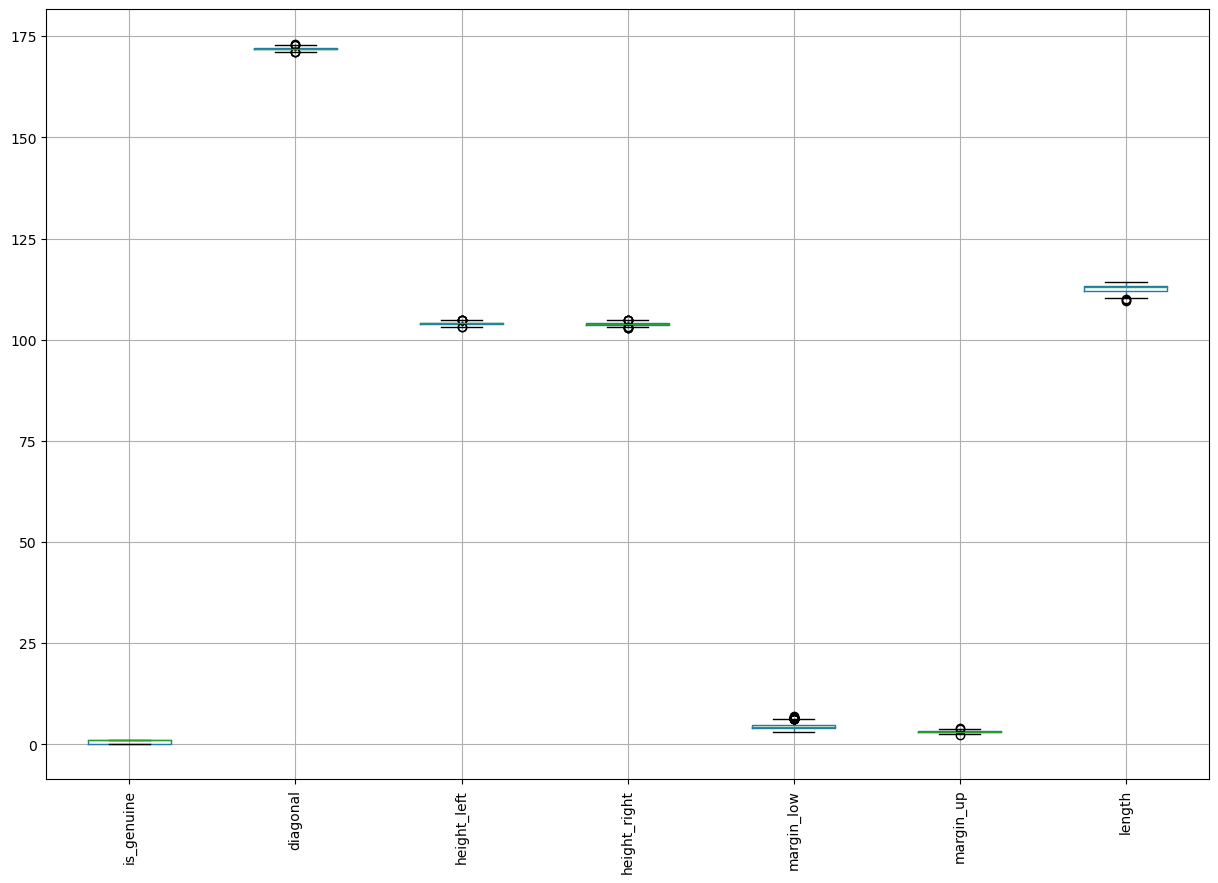

In [14]:
my_boxplots(data)

### Vérification et suppression des outliers

In [15]:
outliers = my_outliers_zscore(data)

In [16]:
display(outliers)
print(outliers.shape)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
522,1,172.02,104.42,102.91,3.86,3.12,113.43
664,1,172.05,103.70,103.75,5.04,2.27,113.55
729,1,171.04,103.84,103.64,4.22,3.36,112.70
828,1,172.92,103.55,103.94,4.78,3.27,113.55
842,1,172.89,103.77,104.24,4.12,3.01,113.72
1022,0,172.89,104.03,104.03,6.03,3.00,110.95
1027,0,171.63,104.02,104.66,6.70,3.28,111.28
1029,0,171.96,104.29,104.03,6.01,3.91,110.83
1041,0,171.77,104.12,104.42,6.65,3.63,111.53


(23, 7)


In [17]:
data.shape

(1463, 7)

In [18]:
data = data.drop(outliers.index, axis=0)

In [19]:
data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
5,1,172.17,103.74,104.08,4.42,2.95,112.81
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


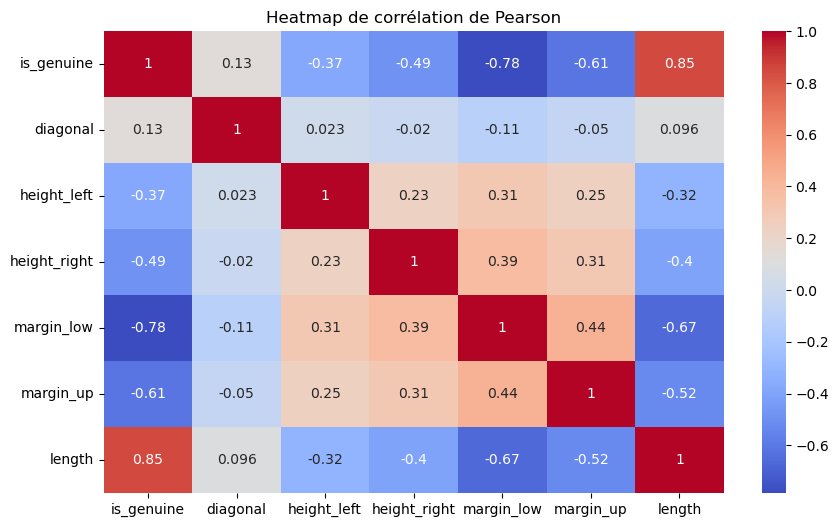

In [20]:
my_corr_heatmap(data)

## Visualisation des Faux Billets vs Vrais Billets

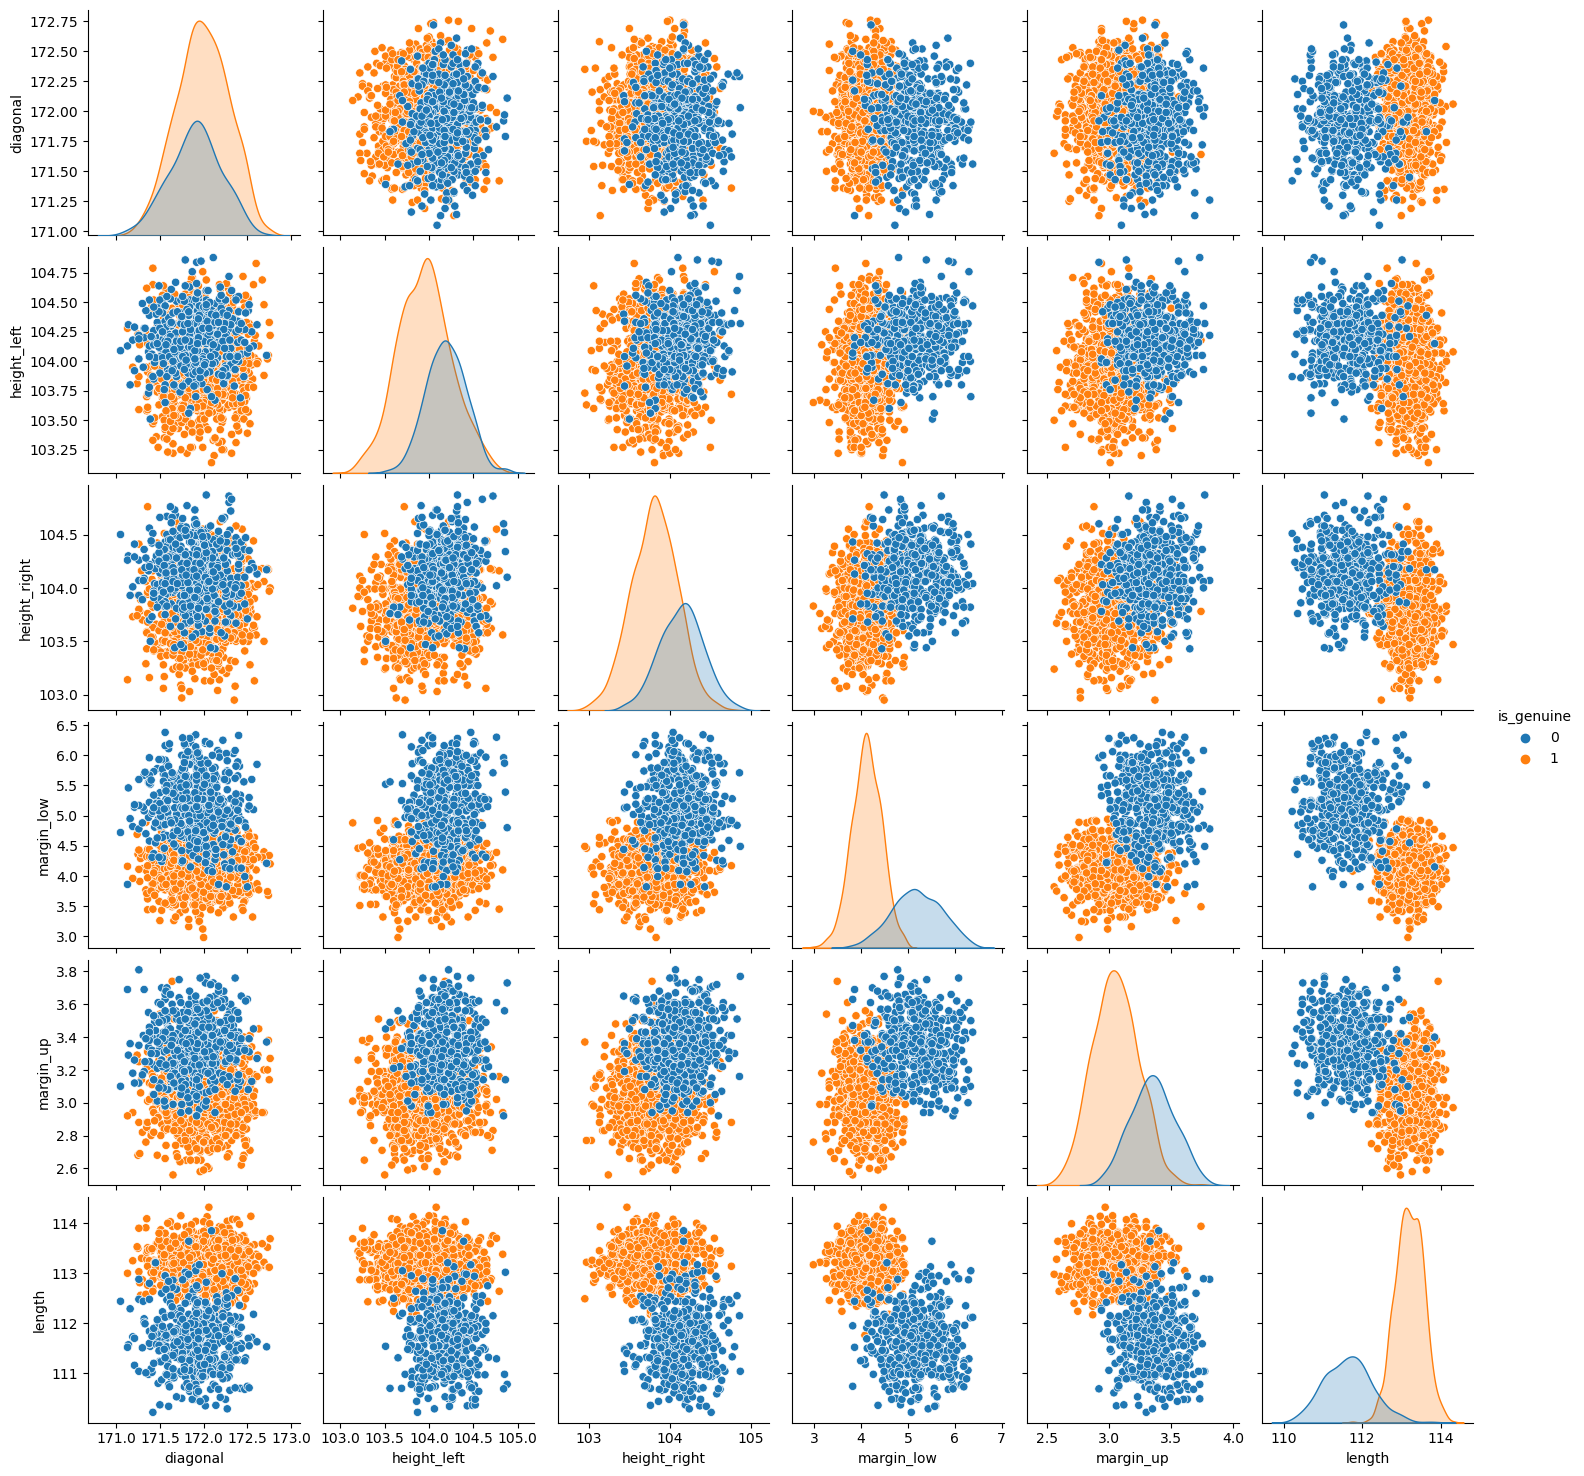

In [21]:
sns.pairplot(data, hue="is_genuine")

## Nettoyage des données

# Régression linéaire

## Avec StatsModels

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [23]:
data.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [24]:
# Ajouter le binaire pour le vrai/faux : OK
# Voir les fuites de données pour les nouveaux billets
# Vérifier les hypothèses de la régression linéaire, voir les trasformation de données
# Faire le train/test : OK
# Regression logistique, vérifier les hypothèses (résidus stable,...)
# R2, matrice de confusion : OK
# Voir les outliers (éventuelleùent enlever des individus ou variable) : OK

# Initialisation de la regression linéaire
reg_simple = smf.ols('margin_low ~ length', data=data).fit()
reg_multi = smf.ols('margin_low ~ is_genuine+margin_up', data=data).fit()

# on affiche les résultat
print(reg_multi.summary())

# on affiche les résultat
print(reg_simple.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1169.
Date:                Mon, 08 May 2023   Prob (F-statistic):          4.36e-302
Time:                        10:46:00   Log-Likelihood:                -707.93
No. Observations:                1440   AIC:                             1422.
Df Residuals:                    1437   BIC:                             1438.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8530      0.194     30.206      0.0

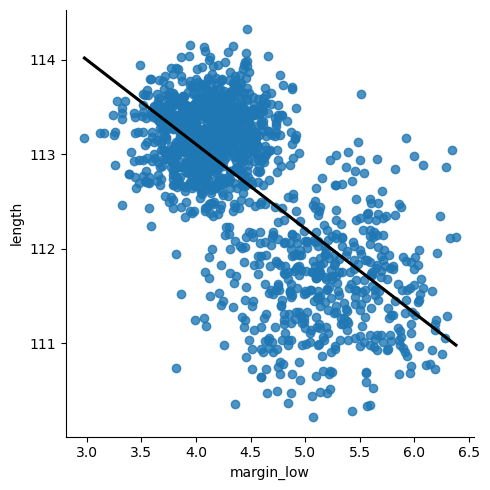

In [25]:
# Affichage graphique de la regression avec la fonction sns.lmplot()
ax = sns.lmplot(x="margin_low", y="length", data=data, ci=None, line_kws={'color':'black'})
ax.set(xlabel='margin_low', ylabel='length')
plt.show()

In [26]:
# Création de la colonne avec les résidus
data['residu_s'] = reg_multi.resid

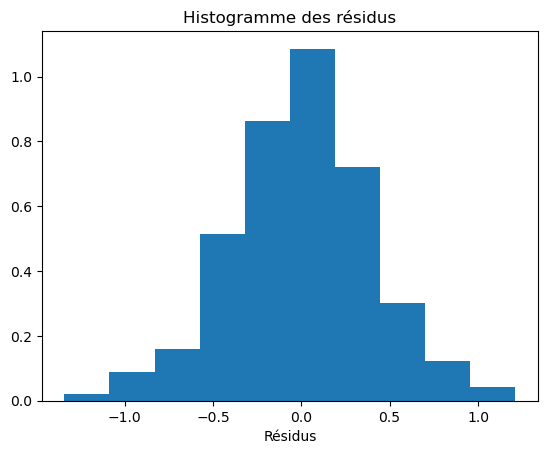

In [27]:
# Affichage graphique des résidus
plt.hist(data['residu_s'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

In [28]:
# Simple

# Création de la prediction réalisé grâce à la regression linéaire calculé
a_prevoir = pd.DataFrame({'length':data_vide["length"]})
margin_low_prev = reg_simple.predict(a_prevoir)
print(round(margin_low_prev, 2))

72      4.42
99      4.27
151     4.35
197     4.18
241     4.63
251     4.20
284     4.17
334     4.13
410     4.34
413     4.34
445     4.33
481     3.82
505     3.99
611     4.39
654     4.42
675     4.18
710     4.49
739     4.61
742     4.28
780     4.11
798     3.60
844     4.14
845     4.00
871     4.18
895     3.91
919     3.98
945     4.42
946     4.47
981     4.13
1076    4.87
1121    4.62
1176    5.16
1303    5.20
1315    4.67
1347    5.65
1435    5.07
1438    5.06
dtype: float64


In [29]:
#Multiple

# Création de la prediction réalisé grâce à la regression linéaire calculé
a_prevoir = pd.DataFrame({'is_genuine':data_vide["is_genuine"],
                          'margin_up':data_vide["margin_up"]})
margin_low_prev = reg_multi.predict(a_prevoir)
print(round(margin_low_prev, 2))

72      4.07
99      4.10
151     4.12
197     4.00
241     4.12
251     4.13
284     4.08
334     4.12
410     4.10
413     4.09
445     4.12
481     4.18
505     4.13
611     4.06
654     4.18
675     4.21
710     4.11
739     4.11
742     4.08
780     4.10
798     4.12
844     4.13
845     4.14
871     4.11
895     4.13
919     4.21
945     4.12
946     4.07
981     4.13
1076    5.21
1121    5.22
1176    5.25
1303    5.27
1315    5.17
1347    5.13
1435    5.14
1438    5.21
dtype: float64


In [30]:
# Vérification/comparaison des écarts-type et de la moyenne. L'objectif est de vérifier si les prévisions sont cohérentes
# avec les valeurs existantes
display(margin_low_prev.describe())
display(data[["margin_low"]].describe())

count    37.000000
mean      4.351551
std       0.454631
min       4.001107
25%       4.100816
50%       4.124746
75%       4.208502
max       5.268689
dtype: float64

,margin_low
count,1440.000000
mean,4.467292
std,0.641409
min,2.980000
25%,4.010000
50%,4.310000
75%,4.840000
max,6.380000


Les valeurs de l'ecart type et de la moyenne sont sensiblements différents entre les prévisions et les données existantes. 
- Moyenne : Différence de 2,7%
- Ecart-Type : Différence de 29%

La moyenne semble cohérentes mais la différence avec l'écart type semble trop important. Nous allons revoir regarder cela de plus près pour comprendre d'où vient l'écart. 

In [31]:
# Création d'un DataFrame dans lequel on stock nos valeurs
margin_low_prev = pd.DataFrame(margin_low_prev)

In [32]:
# On ajoute les valeurs calculé à l'aide de la regression linéaire à notre table data_vide pour remplacé les valeurs manquantes
#data_vide = data_vide.assign(margin_low=margin_low_prev)

In [33]:
# On fusionne les table data et data_vide
#data = data.append(data_vide)

In [34]:
data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,residu_s
1,1,171.46,103.36,103.66,3.77,2.99,113.09,-0.356741
2,1,172.69,104.48,103.50,4.40,2.94,113.16,0.263289
3,1,171.36,103.91,103.94,3.62,3.01,113.51,-0.502752
4,1,171.73,104.28,103.46,4.04,3.48,112.54,0.010974
5,1,172.17,103.74,104.08,4.42,2.95,112.81,0.285283
...,...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28,-0.816783
1496,0,172.19,104.63,104.44,5.27,3.37,110.97,0.089054
1497,0,171.80,104.01,104.12,5.51,3.36,111.95,0.327060
1498,0,172.06,104.28,104.06,5.17,3.46,112.25,0.007002


In [35]:
# On supprime la colonne residus_s qui ne nous est plus utile.
data = data.drop(["residu_s"], axis=1)

In [36]:
# on vérifie que nous n'avons plus de valeurs manquantes
my_first_analyse(data)

,observations,variables,type,moyennes,medianes,ecart_types,min,max,nb_valeurs_manquantes,%_valeurs_manquantes
is_genuine,1440,7,int64,0.670139,1.00,0.470326,0.00,1.00,0,0.0
diagonal,1440,7,float64,171.959597,171.96,0.300154,171.05,172.76,0,0.0
height_left,1440,7,float64,104.029972,104.04,0.299481,103.14,104.88,0,0.0
height_right,1440,7,float64,103.917958,103.92,0.320917,102.95,104.87,0,0.0
margin_low,1440,7,float64,4.467292,4.31,0.641409,2.98,6.38,0,0.0
margin_up,1440,7,float64,3.151403,3.14,0.229340,2.56,3.81,0,0.0
length,1440,7,float64,112.689319,112.97,0.859743,110.22,114.32,0,0.0


## Avec SkLearn

### Régression linéaire Simple

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data["length"].values.reshape(len(data),1)
y = data["margin_low"].values.reshape(len(data),1)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [39]:
model_simple = LinearRegression()
model_simple.fit(x_train, y_train)
model_simple.score(x_test,y_test)

0.4525430483290147

In [40]:
predictions = model_simple.predict(x_test)

<AxesSubplot:>

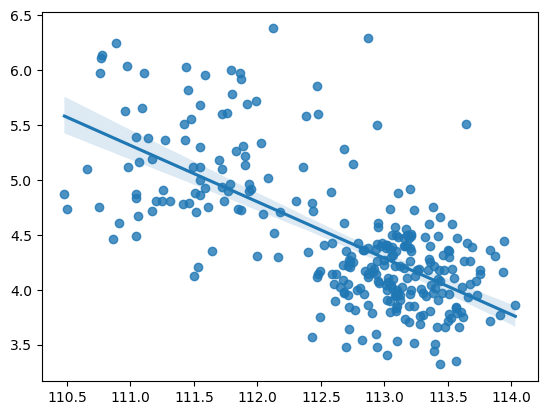

In [41]:
sns.regplot(x_test, y_test)

### Régression Linéaire Multiple

In [42]:
X = data[["length","is_genuine"]]
y = data["margin_low"]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [44]:
model_multiple = LinearRegression()
model_multiple.fit(x_train, y_train)
model_multiple.score(x_test,y_test)

0.6061866120095425

In [45]:
predictions = model_multiple.predict(x_test)

### Application de la régression linéaire aux données

In [46]:
# Application sur les données manquantes
X = data_vide[["length","is_genuine"]]

In [47]:
# Prédiction de y avec X
predictions = model_multiple.predict(X)

In [48]:
# Création d'un DataFrame dans lequel on stock nos valeurs
margin_low_prev_sk_s = pd.DataFrame(predictions)

In [49]:
margin_low_prev_sk_s

,0
0,4.096177
1,4.109240
2,4.102484
3,4.117799
4,4.076808
5,4.115547
6,4.118700
7,4.121853
8,4.103384
9,4.103384


In [50]:
data_vide.reset_index(inplace=True, drop=True)

In [51]:
data_vide

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.94,103.89,103.45,NaN,3.25,112.79
1,1,171.93,104.07,104.18,NaN,3.14,113.08
2,1,172.07,103.80,104.38,NaN,3.02,112.93
3,1,171.45,103.66,103.80,NaN,3.62,113.27
4,1,171.83,104.14,104.06,NaN,3.02,112.36
5,1,171.80,103.26,102.82,NaN,2.95,113.22
6,1,171.92,103.83,103.76,NaN,3.23,113.29
7,1,171.85,103.70,103.96,NaN,3.00,113.36
8,1,172.56,103.72,103.51,NaN,3.12,112.95
9,1,172.30,103.66,103.50,NaN,3.16,112.95


In [52]:
data_test = data_vide.assign(margin_low=margin_low_prev_sk_s)

In [53]:
data_test

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.94,103.89,103.45,4.096177,3.25,112.79
1,1,171.93,104.07,104.18,4.109240,3.14,113.08
2,1,172.07,103.80,104.38,4.102484,3.02,112.93
3,1,171.45,103.66,103.80,4.117799,3.62,113.27
4,1,171.83,104.14,104.06,4.076808,3.02,112.36
5,1,171.80,103.26,102.82,4.115547,2.95,113.22
6,1,171.92,103.83,103.76,4.118700,3.23,113.29
7,1,171.85,103.70,103.96,4.121853,3.00,113.36
8,1,172.56,103.72,103.51,4.103384,3.12,112.95
9,1,172.30,103.66,103.50,4.103384,3.16,112.95


In [54]:
data = data.append(data_test)

In [55]:
my_first_analyse(data, False)

,observations,variables,type,moyennes,medianes,ecart_types,min,max,nb_valeurs_manquantes,%_valeurs_manquantes
is_genuine,1477,7,int64,0.672986,1.00,0.469281,0.00,1.00,0,0.0
diagonal,1477,7,float64,171.958822,171.96,0.300018,171.05,172.76,0,0.0
height_left,1477,7,float64,104.028179,104.04,0.299330,103.14,104.88,0,0.0
height_right,1477,7,float64,103.916858,103.92,0.322470,102.82,104.87,0,0.0
margin_low,1477,7,float64,4.464170,4.30,0.637373,2.98,6.38,0,0.0
margin_up,1477,7,float64,3.149810,3.14,0.229737,2.56,3.81,0,0.0
length,1477,7,float64,112.692756,112.97,0.859516,110.22,114.44,0,0.0


# Classification

In [56]:
my_first_analyse(data)

,observations,variables,type,moyennes,medianes,ecart_types,min,max,nb_valeurs_manquantes,%_valeurs_manquantes
is_genuine,1477,7,int64,0.672986,1.00,0.469281,0.00,1.00,0,0.0
diagonal,1477,7,float64,171.958822,171.96,0.300018,171.05,172.76,0,0.0
height_left,1477,7,float64,104.028179,104.04,0.299330,103.14,104.88,0,0.0
height_right,1477,7,float64,103.916858,103.92,0.322470,102.82,104.87,0,0.0
margin_low,1477,7,float64,4.464170,4.30,0.637373,2.98,6.38,0,0.0
margin_up,1477,7,float64,3.149810,3.14,0.229737,2.56,3.81,0,0.0
length,1477,7,float64,112.692756,112.97,0.859516,110.22,114.44,0,0.0


In [57]:
from sklearn.neighbors import KNeighborsClassifier 

In [58]:
data["is_genuine"].replace([True, False], [1,0], inplace=True)

In [59]:
y = data["is_genuine"]
X = data.drop("is_genuine", axis=1)

In [60]:
model = KNeighborsClassifier()
model.fit(X,y)
model.score(X,y)

0.991198375084631

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

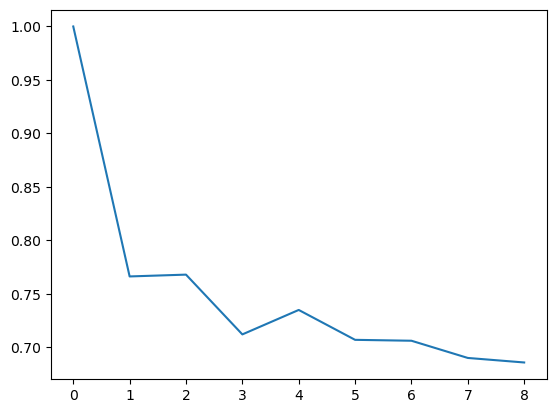

In [87]:
score = []
for i in range(1,10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    score.append(model.score(x_train,y_train))
plt.plot(score)

In [64]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
model.score(x_train,y_train)

1.0

In [65]:
y_pred = model.predict(x_test)

### Matrice de confusion

In [66]:
# Inverser matrice de confusion et résultat
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

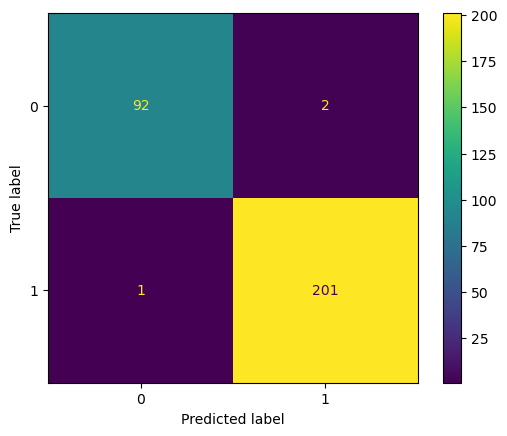

In [67]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

### Résultat

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [69]:
y_pred = model.predict(x_test)

In [70]:
# Vérifier les type de score
print("Accuracy_score : ",round(accuracy_score(y_test, y_pred),4))
print("F1_score : ",round(f1_score(y_test, y_pred),4))
print("Recall_score : ",round(recall_score(y_test, y_pred),4))

Accuracy_score :  0.9899
F1_score :  0.9926
Recall_score :  0.995


# Regression Logistique

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
X_train ,X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)

In [82]:
model = LogisticRegression()

In [83]:
model.fit(X_train,y_train)

LogisticRegression()

In [84]:
model.score(X_test,y_test)

0.9932432432432432

In [85]:
y_pred = model.predict(X_test)

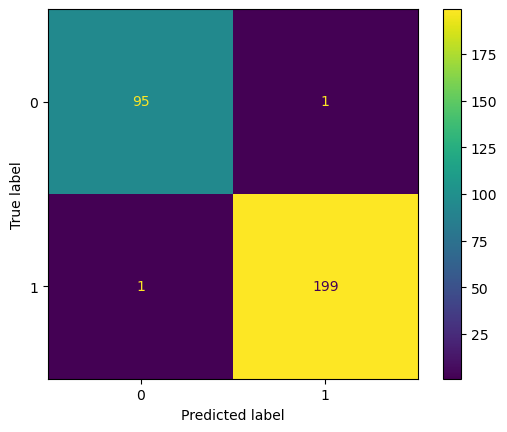

In [86]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [78]:
# Vérifier les type de score
print("Accuracy_score : ",round(accuracy_score(y_test, y_pred),4))
print("F1_score : ",round(f1_score(y_test, y_pred),4))
print("Recall_score : ",round(recall_score(y_test, y_pred),4))

Accuracy_score :  0.9899
F1_score :  0.9925
Recall_score :  0.995
